In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head() #price is lakhs

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Cleaning

In [7]:
df2 = df.drop(['area_type', 'society', 'availability'],axis='columns')

In [8]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df2.location.values

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       'Raja Rajeshwari Nagar', 'Padmanabhanagar', 'Doddathoguru'],
      dtype=object)

In [10]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
balcony_md = df2.balcony.median()
balcony_md

2.0

In [12]:
df2['balcony'].fillna(balcony_md,inplace=True)

In [13]:
df2['balcony'].isnull().values.any()

False

In [14]:
bath_median = df2.bath.median()
bath_median

2.0

In [15]:
df2['bath'].fillna(bath_median,inplace=True)

In [16]:
df2['bath'].isnull().values.any()

False

As the number of missing values in size column is very low we can drop those rows

In [17]:
df3 = df2.dropna()

In [18]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

### So now we have no missing values

In [19]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
df3['BHK'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\THUNDER\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df3.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [22]:
df3 = df3.drop('size',axis='columns')
df3.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [23]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [72]:
df3[df3['BHK']>11]

,location,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
3379,1Hanuman Nagar,2000,16.0,2.0,490.0,19
3609,Koramangala Industrial Layout,10000,16.0,2.0,550.0,16
4684,Munnekollal,2400,40.0,0.0,660.0,43
4916,1Channasandra,1250,15.0,0.0,125.0,14
6533,Mysore Road,2232,6.0,2.0,300.0,12
9935,1Hoysalanagar,5425,13.0,0.0,275.0,13
11559,1Kasavanhalli,1200,18.0,2.0,200.0,18


In [24]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [73]:
df3.dtypes

location       object
total_sqft     object
bath          float64
balcony       float64
price         float64
BHK             int64
dtype: object

In [74]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [76]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


The data in total_sqft column is vey messy. Some are given in a range and some are given in some other units like Sq. Meter, Perch and so on.

In [77]:
#function for changing the range values to average
def convert_to_float(x):
    r = x.split(' - ')
    if(len(r)==2):
        return (float(r[0]) + float(r[1]))/2
    try:
        return float(x)
    except:
        return None 

In [78]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_to_float)
df4.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [79]:
df4.loc[30]

location      Yelahanka
total_sqft         2475
bath                  4
balcony               0
price               186
BHK                   4
Name: 30, dtype: object

So the ranges are converted to single value

In [80]:
df4.total_sqft.dtypes

dtype('float64')

In [81]:
df4.price.dtypes

dtype('float64')

In [82]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [83]:
len(df4.location.unique())

1304

In [84]:
df4.location = df4.location.apply(lambda x : x.strip())

location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           540
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       273
Thanisandra          237
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [85]:
len(location_stats[location_stats <= 10])

1052

In [86]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [87]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [88]:
df4[df4.total_sqft / df4.BHK < 150].head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268
119,Hennur Road,276.0,3.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,950.0,7.0,0.0,115.0,7,12105.263158
176,Kumaraswami Layout,600.0,3.0,2.0,85.0,5,14166.666667


In [89]:
df4 = df4[~(df4.total_sqft / df4.BHK < 150)]
df4.shape

(13154, 7)

In [90]:
df4.describe()

,total_sqft,bath,balcony,price,BHK,price_per_sqft
count,13108.000000,13154.000000,13154.000000,13154.000000,13154.000000,13108.000000
mean,1567.619182,2.645507,1.599894,112.405078,2.753459,6596.741559
std,1242.189844,1.212595,0.800823,149.565384,1.143324,4424.001228
min,250.000000,1.000000,0.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4256.686930
50%,1280.000000,2.000000,2.000000,71.000000,3.000000,5409.486828
75%,1684.000000,3.000000,2.000000,120.000000,3.000000,7211.538462
max,52272.000000,27.000000,3.000000,3600.000000,27.000000,176470.588235


In [91]:
def remove_outliers_pps(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df =subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft <= (m + sd))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [92]:
df5 = df4.copy()
df5 = remove_outliers_pps(df5)
df5.shape

(10860, 7)

In [93]:
def plot_scatter(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,c='red',label='2 BHK',marker='o')
    plt.scatter(bhk3.total_sqft,bhk3.price,c='green',label='3 BHK',marker='*')
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

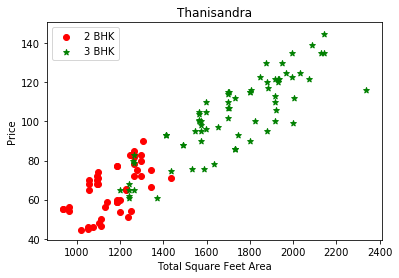

In [94]:
plot_scatter(df5,'Thanisandra')

In some places the house price of 3 BHK is less than 2 BHK 

In [95]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [96]:
df6 = remove_bhk_outlier(df5)
df6.shape

(7766, 7)

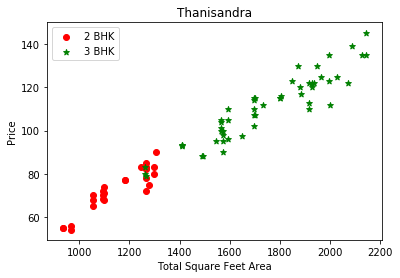

In [97]:
plot_scatter(df6,'Thanisandra')

So now many of the outliers are removed

Text(0, 0.5, 'Count')

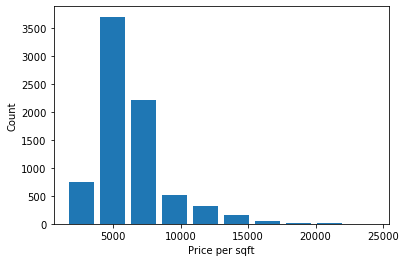

In [98]:
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [99]:
df6.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 12., 10., 27., 16.,
       13.])

In [100]:
df6[df6.bath>10]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
5602,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
8715,other,8000.0,27.0,0.0,230.0,27,2875.000000
9060,other,10000.0,16.0,2.0,550.0,16,5500.000000
9851,other,6000.0,12.0,2.0,150.0,11,2500.000000
10207,other,5425.0,13.0,0.0,275.0,13,5069.124424


In [101]:
df6.balcony.unique()

array([1., 2., 3., 0.])

Text(0, 0.5, 'Count')

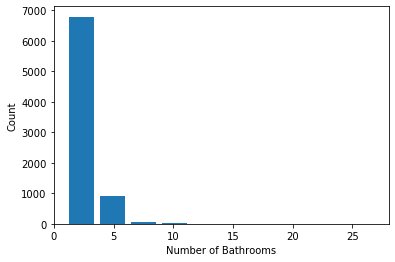

In [102]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

So number of bathrooms greater than number of bedrooms by 2 is an outlier

In [103]:
df6[df6.bath > df6.BHK + 3]


,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
5562,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429


In [104]:
df7 = df6[df6.bath <= df6.BHK + 3]
df7.shape

(7765, 7)

# Data Preprocessing

In [105]:
df_new = df7.drop('price_per_sqft',axis='columns')
df_new.head()

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3


In [106]:
d = pd.get_dummies(df_new.location)
df_main = pd.concat([df_new,d.drop('other',axis='columns')],axis='columns')
df_main.head()

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df_main = df_main.drop('location',axis='columns')
df_main.head(2)

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df_main.shape

(7765, 246)

In [109]:
X = df_main.drop('price',axis='columns')
y = df_main['price']

# Splitting into training data and testing data

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# Building ML model

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
lr.score(X_test,y_test)

0.8549532974049148

In [113]:
from sklearn.linear_model import Lasso

lss = Lasso()
lss.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
lss.score(X_test,y_test)

0.6925096520428288

In [115]:
from sklearn.tree import DecisionTreeRegressor
dct = DecisionTreeRegressor(random_state=10)
dct.fit(X_train,y_train)
dct.score(X_test,y_test)

0.7492150927134972

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8165130790478202

So we can see out of all these Linear Regression performs the best.

In [117]:
def predict_price(location,sqft,bhk,bath,balcony):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr.predict([x])[0]

In [118]:
import pickle
f = open('ml_model.pickle','wb')
pickle.dump(lr,f)
f.close()

In [119]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    json.dump(columns,f)